<a href="https://colab.research.google.com/github/palashbaranwal/END3/blob/main/Session2_5/Session2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Session 2.5 : PyTorch 101

##Import Libraries 

In [72]:
import torch
import torchvision
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [73]:
print(torch.__version__)

1.9.0+cu111


## Calculate mean and standard deviation of MNIST

In [74]:
# simple transform
simple_transforms = transforms.Compose([transforms.ToTensor()])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


<font color="blue">  From above, we identify mean to be 0.1307 and standard deviation to be 0.3081 </font>



In [75]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Normalize
                                       ])

test_transforms = train_transforms

## Print an image

In [76]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

In [77]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [78]:
# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
torch.Size([128])
tensor(9)
9
<class 'torch.Tensor'>


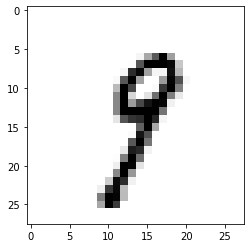

In [79]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
# train_data = train.train_data
# train_data = train.transform(train_data.numpy())

dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
print(labels[0])
print(labels[0].numpy())
print(type(labels[0]))


<font color="blue">  This is a classic 2. I even tried drawing like this. :D </font>



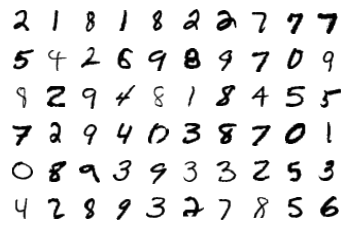

In [80]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')
    # plt.imshow(images[index], cmap='gray_r')

In [81]:
print(f'Number of examples in training dataset :{len(train)}')
print(f'Shape of the training dataset - images : {train.data.shape}')
print(f'Labels in the training dataset : {train.targets}')

Number of examples in training dataset :60000
Shape of the training dataset - images : torch.Size([60000, 28, 28])
Labels in the training dataset : tensor([5, 0, 4,  ..., 5, 6, 8])


# Create a custom dataset

### Why do we need a custom dataset here?

Reference - [https://pytorch.org/tutorials/beginner/data_loading_tutorial.html](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [82]:
from torch.utils.data import Dataset
import torch.nn.functional as F
import random

class MyCustomDataset(Dataset):
  """Custom dataset to initialize data required for this project"""
  def __init__(self,myDataset):
    self.myDataset = myDataset
    
  def __len__(self):
    return(self.myDataset)

  def __getitem__(self,idx):
    """Get a random number from 0 to 9"""
    randNum = random.randint(0, 9)

    """Convert a random number to a tensor. This is required for one-ho encoding"""
    randNum_tensor = torch.tensor(randNum)

    """Get a random number from MNIST"""
    rand_image,rand_image_value = self.myDataset[index]

    """One hot encoding the random number"""
    print(type(randNum))
    randNum_OHE = F.one_hot(randNum_tensor,num_classes=10)
    print(randNum_OHE)

    """Expected Output"""
    expected_sum = randNum + rand_image_value

    """Return a tuple"""
    return_tuple = (randNum_OHE,rand_image,rand_image_value,expected_sum)

    return return_tuple



In [83]:
custom_train_dataset = MyCustomDataset(train)
custom_test_dataset = MyCustomDataset(test)

In [84]:
randomNumber,image, label1, label2 = next(iter(custom_train_dataset))
randomNumber.shape,image.shape, label1, label2

<class 'int'>
tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])


(torch.Size([10]), torch.Size([1, 28, 28]), 4, 6)

##Re-create Data loader

In [96]:
del train_loader


In [97]:
# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(custom_train_dataset, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(custom_test_dataset, **dataloader_args)

TypeError: ignored

## Creating a new network

In [85]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        ) # output_size = 24
        
        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 10
        self.fc1 = nn.Linear(1440,794)
        self.fc2 = nn.Linear(794,10)
        self.fc3 = nn.Linear(794,19)
        

    def forward(self, x, y):
    # def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.pool1(x)
        
        """ Flatten the image into a 1x1 tensor - https://pytorch.org/docs/stable/generated/torch.flatten.html """
        x = torch.flatten(x,1)

        """ Concat the flattened image with encoded random number """  
        x = torch.cat((x,y),1)

        pred_img = self.fc2(x)
        pred_sum = self.fc3(x)

        pred_img_opt = F.log_softmax(pred_img,dim=1)
        pred_sum_opt = F.log_softmax(pred_sum,dim=1)
        return pred_img_opt,pred_sum_opt


In [86]:
# !pip install torch-summary
# from torchsummary import summary


In [87]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)


cuda


In [88]:
model = Net().to(device)
model


Net(
  (convblock1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (convblock2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1440, out_features=794, bias=True)
  (fc2): Linear(in_features=794, out_features=10, bias=True)
  (fc3): Linear(in_features=794, out_features=19, bias=True)
)

In [98]:
summary(model, [(1,28,28)])

TypeError: ignored

## Training and Testing

In [92]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (randNum_OHE,rand_image,rand_image_value,expected_sum) in enumerate(pbar):
    # get samples
    randNum_OHE, rand_image, rand_image_value, expected_sum = randNum_OHE.to(device), rand_image.to(device), rand_image_value.to(device), expected_sum.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when we start your training loop, ideally we should zero out the gradients so that we do the parameter update correctly.

    # Predict
    pred_ImgValue,pred_Sum = model(rand_image,randNum_OHE)

    # Calculate loss
    loss = F.nll_loss(pred_ImgValue, rand_image_value) + F.nll_loss(pred_Sum, expected_sum)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    correct1 = 0
    with torch.no_grad():
        for randNum_OHE,rand_image,rand_image_value,expected_sum in test_loader:
            randNum_OHE,rand_image,rand_image_value,expected_sum = randNum_OHE.to(device), rand_image.to(device), rand_image_value.to(device), expected_sum.to(device)
            pred_ImgValue,pred_Sum = model(rand_image,randNum_OHE)

            test_loss += F.nll_loss(pred_ImgValue, rand_image_value, reduction='sum').item() + F.nll_loss(pred_Sum, expected_sum, reduction='sum')

            pred_ImgValue1 = pred_ImgValue.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            pred_Sum1 = pred_Sum.argmax(dim=1, keepdim=True) # get the index of the max log-probability

            correct += pred.eq(target.view_as(pred_ImgValue1)).sum().item()
            correct1 += pred.eq(target.view_as(pred_Sum1)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [94]:
import torch.optim as optim
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/469 [00:00<?, ?it/s]


ValueError: ignored